# Data Story

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [2]:
df = pd.read_csv('DW.csv')
df.head()

,Unnamed: 0,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,Unnamed: 0,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
Unnamed: 0,1.000000,0.187103,0.207752,-0.385506,0.086035,0.036669,0.012633,-0.020481,-0.406864,0.365989,0.295582,-0.265605,0.385534,0.248180,-0.859486
age,0.187103,1.000000,-0.081195,-0.067287,0.294145,0.191597,0.121045,-0.107468,-0.402562,0.110847,0.204472,-0.162461,0.277059,0.060265,-0.226311
sex,0.207752,-0.081195,1.000000,-0.055975,-0.035976,-0.146364,0.066066,-0.093206,-0.039149,0.147742,0.159040,-0.056823,0.160468,0.240942,-0.298484
chest_pain,-0.385506,-0.067287,-0.055975,1.000000,0.074422,-0.108022,0.092018,0.045284,0.287560,-0.393396,-0.117034,0.095270,-0.168474,-0.152023,0.419421
resting_blood_pressure,0.086035,0.294145,-0.035976,0.074422,1.000000,0.138561,0.162065,-0.086899,-0.069104,0.062008,0.152773,-0.097627,0.063551,0.027187,-0.115185
cholesterol,0.036669,0.191597,-0.146364,-0.108022,0.138561,1.000000,-0.005423,-0.111930,-0.039361,0.090152,0.045561,0.000388,0.060564,0.069243,-0.108735
fasting_blood_sugar,0.012633,0.121045,0.066066,0.092018,0.162065,-0.005423,1.000000,-0.075308,-0.009506,0.019688,0.002686,-0.061219,0.137423,-0.029485,-0.035637
rest_ecg,-0.020481,-0.107468,-0.093206,0.045284,-0.086899,-0.111930,-0.075308,1.000000,0.069153,-0.077229,-0.041588,0.090401,-0.046897,0.007503,0.135536
max_heart_rate_achieved,-0.406864,-0.402562,-0.039149,0.287560,-0.069104,-0.039361,-0.009506,0.069153,1.000000,-0.387405,-0.350406,0.377689,-0.236413,-0.106691,0.426189
exercise_induced_angina,0.365989,0.110847,0.147742,-0.393396,0.062008,0.090152,0.019688,-0.077229,-0.387405,1.000000,0.298761,-0.250084,0.120222,0.205048,-0.441071


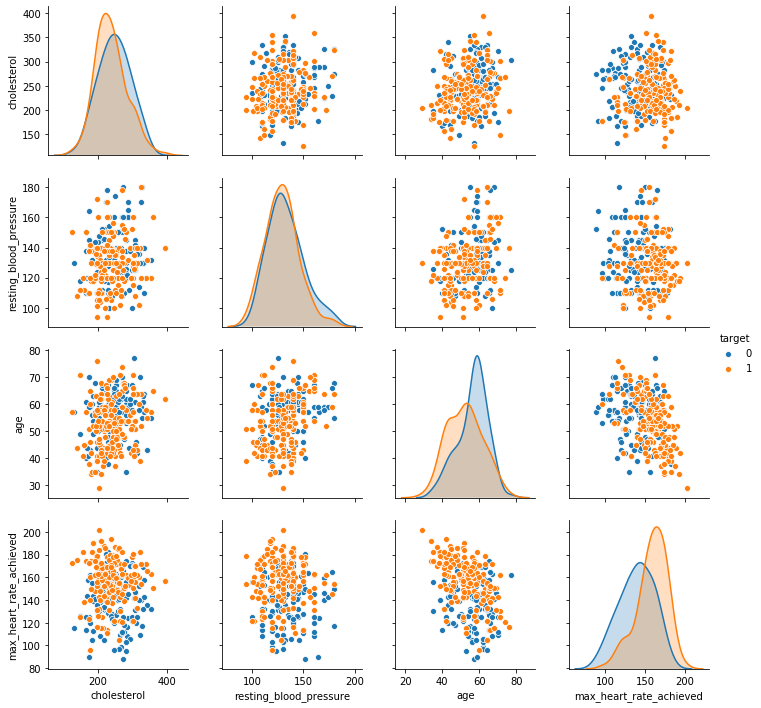

In [3]:
g = sns.pairplot(df,vars=['cholesterol', 'resting_blood_pressure','age','max_heart_rate_achieved'] ,hue="target")
df.corr()

In [4]:
df['sex'].value_counts()

1    204
0     90
Name: sex, dtype: int64

In [5]:
b = df[(df['target'] ==0) & (df['thalassemia'] ==1)]
len(b)

12

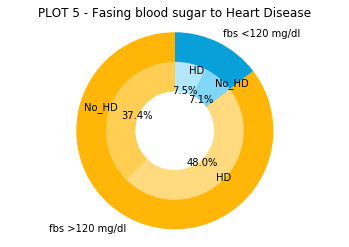

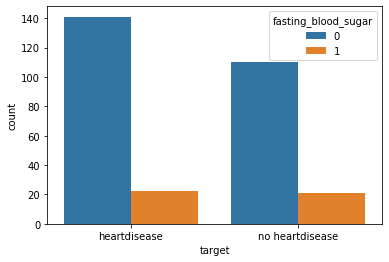

In [6]:
a = df[(df['target'] ==0) & (df['fasting_blood_sugar'] ==0)]
b = df[(df['target'] ==1) & (df['fasting_blood_sugar'] ==0)]
c = df[(df['target'] ==0) & (df['fasting_blood_sugar'] ==1)]
d = df[(df['target'] ==1) & (df['fasting_blood_sugar'] ==1)]

labels = ['fbs >120 mg/dl', 'fbs <120 mg/dl'] 
sizes = df['fasting_blood_sugar'].value_counts()
labels_sex = ['No_HD', 'HD','No_HD','HD']
sizes_sex = [len(a),len(b),len(c),len(d)]
colors = ['#FFB607', '#09A0DA']
colors_sex = ['#FFCE53', '#FFDA7E','#7FD6F7', '#B3E7FB']

plt.subplot(1,1,1)
bigger = plt.pie(sizes, labels=labels, colors=colors,
                 startangle=90, frame=True)
smaller = plt.pie(sizes_sex, labels=labels_sex,
                  colors=colors_sex, radius=0.7,
                  startangle=90, labeldistance=0.9,autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('PLOT 5 - Fasing blood sugar to Heart Disease')
plt.axis('equal')
plt.show()
plt.savefig('fbs vs hd.jpg')

#j = sns.catplot(x="target", hue="fasting_blood_sugar", col="sex",
#                 data=df_0, kind="count",
#                 height=4, aspect=.7);
#j


df['target'] = df['target'].astype(str)
df['target']= df['target'].replace(['1', '0'],['heartdisease','no heartdisease'])
ax = sns.countplot(x="target", hue="fasting_blood_sugar", data=df)
ax

In [8]:
df_0 = pd.read_csv("heart.csv")
df_0['sex'] = df_0['sex'].astype(str)
df_0['sex']= df_0['sex'].replace(['1', '0'],['male','female'])

df_0['target'] = df_0['target'].astype(str)
df_0['target']= df_0['target'].replace(['1', '0'],['heartdisease','no heartdisease'])
df_0.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df_0 = df_0[df_0.thalassemia !=0]
import scipy.stats as st

0.48071931571021576
3.0064283765230376e-19


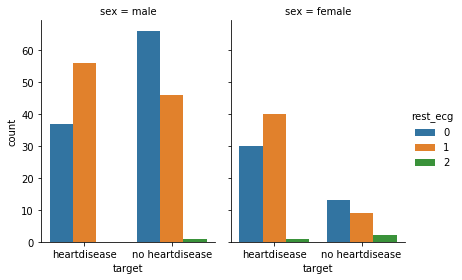

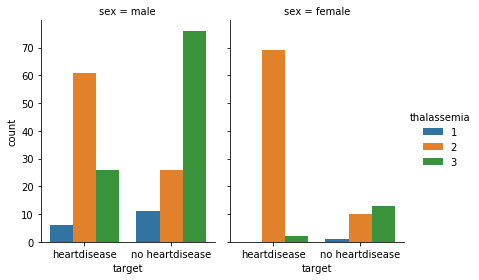

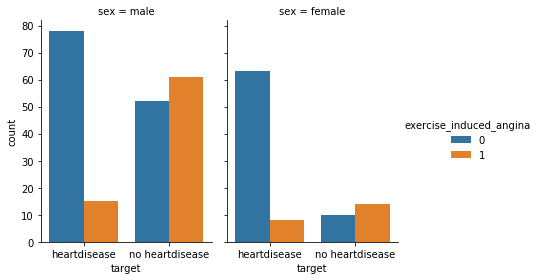

In [14]:
d = sns.catplot(x="target", hue="rest_ecg", col="sex",
                 data=df_0, kind="count",
                 height=4, aspect=.7);
d

d = sns.catplot(x="target", hue="thalassemia", col="sex",
                 data=df_0, kind="count",
                 height=4, aspect=.7);
d

d = sns.catplot(x="target", hue="exercise_induced_angina", col="sex",
                 data=df_0, kind="count",
                 height=4, aspect=.7);
d

b1= pd.crosstab([df_0.thalassemia], [df_0.rest_ecg],
            rownames=['target'],
            colnames=['rest_ecg'],
            dropna=False)

statistic,pval1,deg_of_freed,exp_cnt = stats.chi2_contingency(b1)
print(pval1)

b1= pd.crosstab([df_0.target], [df_0.thalassemia],
            rownames=['target'],
            colnames=['thalassemia'],
            dropna=False)

statistic,pval2,deg_of_freed,exp_cnt = stats.chi2_contingency(b1)
print(pval2)

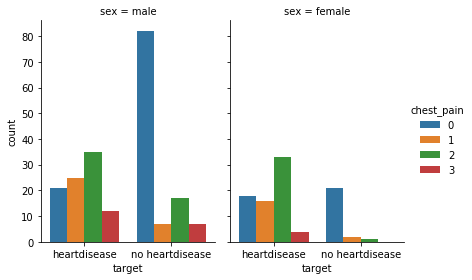

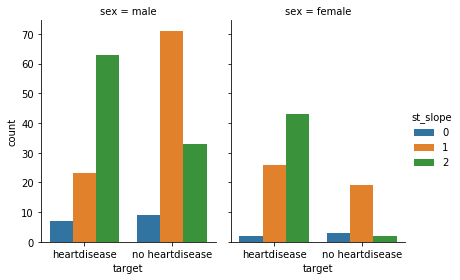

In [10]:
g = sns.catplot(x="target", hue="chest_pain", col="sex",
                 data=df_0, kind="count",
                 height=4, aspect=.7);
g


h = sns.catplot(x="target", hue="st_slope", col="sex",
                 data=df_0, kind="count",
                 height=4, aspect=.7);
h

In [11]:
df = df[df.thalassemia !=0]

In [12]:
df.to_csv('DW2.csv',index = False)